# 0. CV libraries in Pytorch

* `torchvision`
* `torchvision.datasets` - get datasets and loading functions for cv
* `torchvision.models` - get pretrained cv models
* `torchvision.transforms` functions for manipulating your vision data (images) to be suitable for use with an ML model
* `torch.utils` - Base dataset class for Pytorch
* `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset

In [76]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import  transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torchvision.__version__)

0.17.1+cu121


# 1. Getting a dataset

### Fashion-mnist

https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html

In [77]:
# Setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root="data", # where to download the data
    train=True, # do we want the training datasets)
    download=True, # Do we want to download yes/no?
    transform=torchvision.transforms.ToTensor(), # how do we want to transform the data?
    target_transform=None # how do we want to transform labels?
)

test_data = datasets.FashionMNIST(
    root="data", # where to download the data
    train=False, # do we want the training dataset (True), test (False)
    download=True, # Do we want to download yes/no?
    transform=torchvision.transforms.ToTensor(), # how do we want to transform the data?
    target_transform=None # how do we want to transform labels?
)

In [78]:
len(train_data), len(test_data)

(60000, 10000)

In [79]:
# See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [80]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [81]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [82]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [83]:
# Check the shape of our image
print(f"Image shape: {image.shape} -> [color_channel, height, width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channel, height, width]
Image label: Ankle boot


## 2. Visualizing our data

Image shape: torch.Size([1, 28, 28])
Image shape squeezed: torch.Size([28, 28])


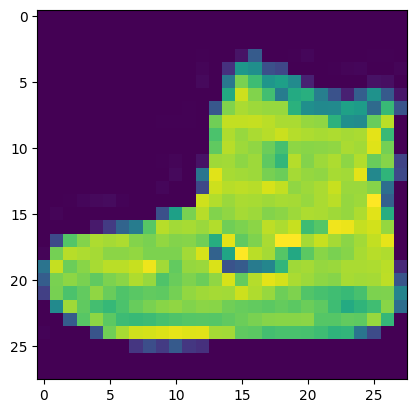

In [84]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
print(f"Image shape squeezed: {image.squeeze().shape}")

plt.imshow(image.squeeze())

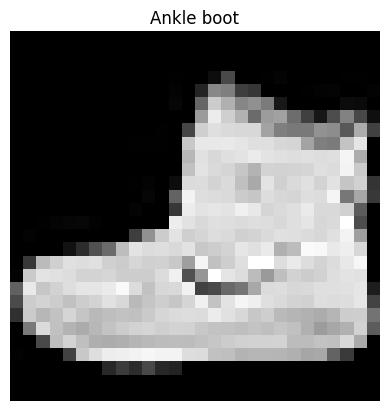

In [85]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label]);
plt.axis(False);

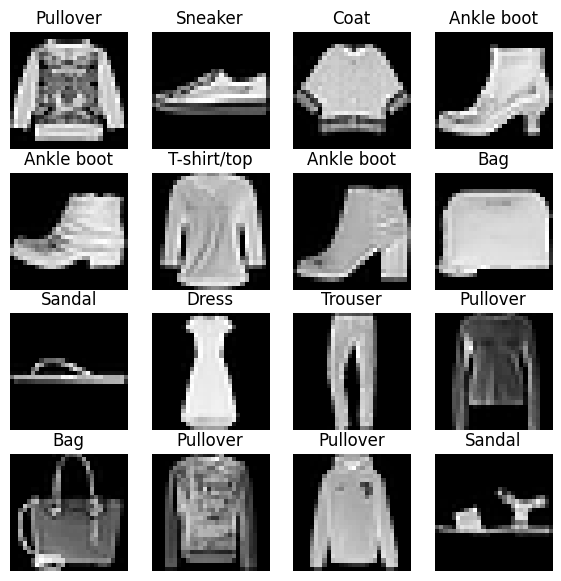

In [86]:
# Plot more random images
torch.manual_seed(43)
fig = plt.figure(figsize=(7,7))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

# 2. Prepare DataLoader

DataLoader turns our dataset tensor into a python iterable.

Tensor data -> minibatches

In [87]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [88]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [89]:
from torch.utils.data import DataLoader

# hyperparameters
hyperparameters = {
    'BATCH_SIZE': 32
}

# turn dataset into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=hyperparameters['BATCH_SIZE'],
                              shuffle=True) # order of the data

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=hyperparameters['BATCH_SIZE'],
                              shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7942479c28c0>,
 <torch.utils.data.dataloader.DataLoader at 0x7942479c2f50>)

In [90]:
# Let's check out what we have created
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of the train_dataloader: {len(train_dataloader)} batches of {hyperparameters['BATCH_SIZE']}...")
print(f"Length of the test_dataloader: {len(test_dataloader)} batches of {hyperparameters['BATCH_SIZE']}...")


DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7942479c28c0>, <torch.utils.data.dataloader.DataLoader object at 0x7942479c2f50>)
Length of the train_dataloader: 1875 batches of 32...
Length of the test_dataloader: 313 batches of 32...


In [91]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 1, label_size: torch.Size([])


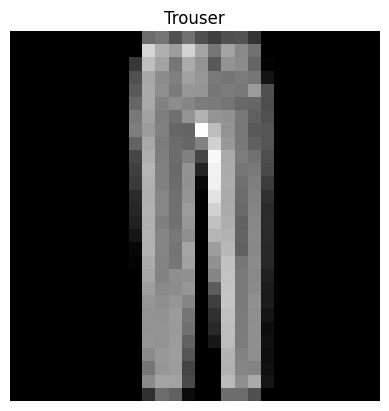

In [92]:
# Visualize a batch
random_idx = torch.randint(0, len(train_features_batch), size= [1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label_size: {label.shape}")

# 3. Model 0, baseline model.

In [93]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]
x.shape

torch.Size([1, 28, 28])

In [94]:
# Let's flatten the sample
output = flatten_model(x) # Perform forward pass

print(f"Shape before flattening: {x.shape}")
print(f"Shape after flattening: {output.shape}")

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [95]:
#output.squeeze()

In [96]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [97]:
from torch import nn

class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int, # newrons per layer
               output_shape: int): # one per class
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # 28x28 to 784, compress img into  a single vector
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)

    )

  def forward(self, x):
    return self.layer_stack(x)

In [98]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=28*28*1,
    hidden_units=16,
    output_shape=len(class_names)
).to('cpu')

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=16, bias=True)
    (2): Linear(in_features=16, out_features=10, bias=True)
  )
)

In [99]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[ 0.0599, -0.0578, -0.1531, -0.3557, -0.1761,  0.0471,  0.2426, -0.5298,
         -0.0458, -0.0342]], grad_fn=<AddmmBackward0>)

In [100]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0313, -0.0194, -0.0231,  ...,  0.0165,  0.0038,  0.0114],
                      [-0.0301, -0.0315, -0.0168,  ...,  0.0032,  0.0287, -0.0005],
                      [-0.0150, -0.0167, -0.0028,  ...,  0.0172,  0.0117, -0.0291]])),
             ('layer_stack.1.bias',
              tensor([ 0.0214,  0.0289,  0.0107,  0.0284, -0.0170, -0.0234, -0.0287, -0.0056,
                      -0.0035, -0.0203, -0.0122, -0.0115,  0.0344, -0.0026,  0.0290,  0.0034])),
             ('layer_stack.2.weight',
              tensor([[ 0.0891,  0.1441, -0.2301, -0.1127, -0.1900,  0.2429,  0.0917, -0.1048,
                       -0.1885,  0.1384,  0.0580, -0.1230, -0.1814, 

### Amb una sola imathe hem comprobat que el model funciona.

## 3.1 Setup loss, optimizer and evaluation metrics.

* Loss function - since we're workking with **multi-class** data, our loss function will be `nn.CrossEntropyLoss()`

* `Optimizer - our optimizer `torch.optim.SGD()` (stochastic gradient descent

* Evaluation metric: classification -> **accuracy**

In [101]:
# calcule accuracy
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

In [102]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [103]:
# import function from previous file
from helper_functions import accuracy_fn

In [104]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

## 3.3 Create a function to timeout experiments

In [105]:
from timeit import default_timer as timer

def print_train_time(start:float,
                     end: float,
                     device: torch.device = None):
  """Prints differences between start and end time."""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [106]:
start_time = timer()
# some code
end_time = timer()
print_train_time(start_time, end_time, 'cpu')

Train time on cpu: 0.000 seconds


5.6771999879856594e-05

## 3.3 Creating a training loop and training a model on batches of data


1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss per batch.
3. Loop through testing batches, perform testing steps, calculate the test loss per batch.
4. Print out what's happening.
5. Time it all (for fun).


In [107]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 3

# Create a training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")
  ### Training
  train_loss = 0
  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    # 1. Forward pass
    y_pred = model_0(X)

    # 2. Calculate the loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss every batch

    # 3. optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss Backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Print out whats happening
    if batch % 400 == 0:
      print(f"Looked at {batch * len(x)}/{len(train_dataloader.dataset)} samples.")

  # Divide total train loss by length of train dataloader
  train_loss/= len(train_dataloader)

  ### Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
      for X, y in test_dataloader:
          # 1. Forward pass
          test_pred = model_0(X)

          # 2. Calculate loss (accumatively)
          test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

          # 3. Calculate accuracy (preds need to be same as y_true)
          test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

      # Calculations on test metrics need to happen inside torch.inference_mode()
      # Divide total test loss by length of test dataloader (per batch)
      test_loss /= len(test_dataloader)

      # Divide total accuracy by length of test dataloader (per batch)
      test_acc /= len(test_dataloader)

  ## Print out what's happening
  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(
    train_time_start_on_cpu,
    train_time_end_on_cpu,
    device = str(next(model_0.parameters()).device)
)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Looked at 0/60000 samples.
Looked at 400/60000 samples.
Looked at 800/60000 samples.
Looked at 1200/60000 samples.
Looked at 1600/60000 samples.

Train loss: 0.58506 | Test loss: 0.50618, Test acc: 82.24%

Epoch: 1
-----
Looked at 0/60000 samples.
Looked at 400/60000 samples.
Looked at 800/60000 samples.
Looked at 1200/60000 samples.
Looked at 1600/60000 samples.

Train loss: 0.47503 | Test loss: 0.48423, Test acc: 83.07%

Epoch: 2
-----
Looked at 0/60000 samples.
Looked at 400/60000 samples.
Looked at 800/60000 samples.
Looked at 1200/60000 samples.
Looked at 1600/60000 samples.

Train loss: 0.45409 | Test loss: 0.47700, Test acc: 83.41%

Train time on cpu: 52.088 seconds


## 4. Make predictions and get Model 0 results

In [108]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
               device = device):
  """Returns a dictionary containing the results of model predicting on data_loader.

  Args:
      model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
      data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
      loss_fn (torch.nn.Module): The loss function of model.
      accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

  Returns:
      (dict): Results of model making predictions on data_loader.
  """
  loss, acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      # Make data device agnostic
      X, y = X.to(device), y.to(device)

      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and accvalues per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                          y_pred=y_pred.argmax(dim=1))

    # Scale loss and acc to find the average loss/acc  per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {'model_name': model.__class__.__name__, # only work when model was created with the class
          'model_loss': loss.item(),
          'model_acc': acc
          }

# Calculate model 0 results on test_dataset
model_0_results = eval_model(model=model_0,
                               data_loader=test_dataloader,
                               loss_fn=loss_fn,
                               accuracy_fn=accuracy_fn)

model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47699886560440063,
 'model_acc': 83.40654952076677}

# 5. Setup device agnostic code (use CPU)

In [109]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [110]:
torch.cuda.is_available()

False

In [111]:
import torch

In [112]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [113]:
# Model with linear and non-linear layers
class FasionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # Flatten inputs into a single vector
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [114]:
torch.manual_seed(42)
model_1 = FasionMNISTModelV1(input_shape=28*28*1,
                             hidden_units=16,
                             output_shape=len(class_names)
                             ).to(device)


In [115]:
next(model_1.parameters()).device

device(type='cpu')

# 6.1 Setup loss, optimizer and evaluation metrics


In [116]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr = 0.1)

# 6.2 Functionizing training  and evaluation/testing loops

Lets create a function for:

* training loop - train_step()

* testing loop - test_step()

In [117]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

In [118]:
def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [119]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(
        model = model_1,
        data_loader=train_dataloader,
        loss_fn = loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(
        model = model_1,
        data_loader=test_dataloader,
        loss_fn = loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.61550 | Train accuracy: 78.17%
Test loss: 0.51932 | Test accuracy: 81.54%

Epoch: 1
---------
Train loss: 0.45612 | Train accuracy: 83.79%
Test loss: 0.46924 | Test accuracy: 83.24%

Epoch: 2
---------
Train loss: 0.42185 | Train accuracy: 84.86%
Test loss: 0.43686 | Test accuracy: 84.62%

Train time on cpu: 40.383 seconds


In [120]:
# Get model_1 results dictionary
model_1_results = eval_model(
    model=model_1,
    data_loader=test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

model_1_results

{'model_name': 'FasionMNISTModelV1',
 'model_loss': 0.436860054731369,
 'model_acc': 84.62460063897764}

In [121]:
model_0_results


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47699886560440063,
 'model_acc': 83.40654952076677}

## Model 2: Building a Convolutional Newral Network

In [175]:
# Create a cnn
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture copying TinyVGG from:
  https://poloclub.github.io/cnn-explainer/
  """
  def __init__(self, input_shape:int, hidden_units: int, output_shape:int):
    super().__init__()
    self.conv_block_1 =  nn.Sequential(
      nn.Conv2d(
        in_channels=input_shape,
        out_channels=hidden_units,
        kernel_size=3, # how big is the square that's going over the image
        stride=1, # quants pixels es mou el kernel cada cop
        padding=1 # marge
      ),
      nn.ReLU(), # non linear
      nn.Conv2d(
          in_channels=hidden_units,
          out_channels=hidden_units,
          kernel_size=3,
          stride=1,
          padding=1
      ),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2) # 60x60 pixels to 30x30, 4 vegades mes lleugera, de 4 pixels 1
    )
    self.conv_block_2 =  nn.Sequential(
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1
        ),
        nn.ReLU(),
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1
        ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(), # output of the 2 blocks is 30x30x10 and we want to flatten the results in a single vector
        nn.Linear(
            # in_features=hidden_units, # first like this and pop the error when class a img
            in_features=hidden_units*7* 7 ,  # then ([1, 16, 7, 7]) add the last 2 numbers
            out_features=output_shape)
    )


  def forward(self, x):
    x = self.conv_block_1(x)
    #print(f"Output shape of conv_block_1: {x.shape}")
    x = self.conv_block_2(x)
    #print(f"Output shape of conv_block_2: {x.shape}")
    x = self.classifier(x)
    #print(f"Output shape of classifier: {x.shape}")
    return x

In [176]:
image.shape

torch.Size([1, 28, 28])

In [177]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=16,
                              output_shape=len(class_names)
                              ).to(device)
model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
  )
)

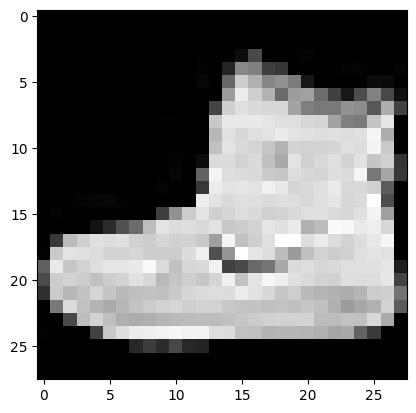

In [178]:
plt.imshow(image.squeeze(), cmap='gray')

In [179]:
image.shape

torch.Size([1, 28, 28])

In [180]:
rand_image_tensor = torch.randn(size=(1,28,28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [181]:
# Pass img through the model, This piece of code gives the error of classifier in features
model_2(rand_image_tensor.unsqueeze(0))

tensor([[ 0.0233,  0.0274,  0.0358,  0.0188, -0.0533, -0.0182, -0.0504,  0.0185,
          0.0022,  0.0535]], grad_fn=<AddmmBackward0>)

In [182]:
#model_2.state_dict()

## 7.1 Steppin through `nn.Conv2d()`

* nn.Conv2d(), also known as a convolutional layer.
* nn.MaxPool2d(), also known as a max pooling layer.


To test the layers out, let's create some toy data just like the data used on CNN Explainer.

In [183]:


torch.manual_seed(42)

# Create sample batch of random numbers with same size as image batch
images = torch.randn(size=(32, 3, 64, 64)) # [batch_size, color_channels, height, width]
test_image = images[0] # get a single image for testing
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]")
#print(f"Single image pixel values:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]


Let's create an example nn.Conv2d() with various parameters:

* in_channels (int) - Number of channels in the input image.
* out_channels (int) - Number of channels produced by the convolution.
* kernel_size (int or tuple) - Size of the convolving kernel/filter.
* stride (int or tuple, optional) - How big of a step the convolving kernel takes at a time. Default: 1.
* padding (int, tuple, str) - Padding added to all four sides of input. Default: 0.


In [184]:
torch.manual_seed(42)
# Create a new conv_layer with different values (try setting these to whatever you like)
conv_layer_2 = nn.Conv2d(in_channels=3, # same number of color channels as our input image
                         out_channels=10,
                         kernel_size=(5, 5), # kernel is usually a square so a tuple also works
                         stride=2,
                         padding=0)

# Pass single image through new conv_layer_2 (this calls nn.Conv2d()'s forward() method on the input)
conv_layer_2(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 30, 30])

Woah, we get another shape change.

Now our image is of shape [1, 10, 30, 30] (it will be different if you use different values) or [batch_size=1, color_channels=10, height=30, width=30].

Behind the scenes, our nn.Conv2d() is compressing the information stored in the image.

If we check out our conv_layer_2.state_dict() we'll find a similar weight and bias setup as we've seen before.

In [185]:
# Check out the conv_layer_2 internal parameters
#print(conv_layer_2.state_dict())

In [186]:
# Get shapes of weight and bias tensors within conv_layer_2
print(f"conv_layer_2 weight shape: \n{conv_layer_2.weight.shape} -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]")
print(f"\nconv_layer_2 bias shape: \n{conv_layer_2.bias.shape} -> [out_channels=10]")


conv_layer_2 weight shape: 
torch.Size([10, 3, 5, 5]) -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]

conv_layer_2 bias shape: 
torch.Size([10]) -> [out_channels=10]


## 7.2 Stepping through nn.MaxPool2d()

what happens when we move data through nn.MaxPool2d():

In [187]:
# Print out original image shape without and with unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(dim=0).shape}")


Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])


In [188]:
# Pass data through just the conv_layer
test_image_through_conv = conv_layer_2(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

Shape after going through conv_layer(): torch.Size([1, 10, 30, 30])


In [189]:
# Create a sample nn.MaxPoo2d() layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")


Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 15, 15])


In [190]:
# Create a random tensor with a similiar number of dimensions to our images
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"Random tensor:\n{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2) # see what happens when you change the kernel_size value

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n{max_pool_tensor} <- this is the maximum value from random_tensor")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")


Random tensor:
tensor([[[[2.2349, 0.0219],
          [0.3207, 0.1633]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
tensor([[[[2.2349]]]]) <- this is the maximum value from random_tensor
Max pool tensor shape: torch.Size([1, 1, 1, 1])


# 7.3 Setup a loss function and an optimizer

In [191]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

In [192]:
#model_2.state_dict()

## Training and testing Model_2 using our training and testing functioms


In [194]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer

train_time_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")
  train_step(model=model_2,
             data_loader = train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device
             )

  test_step(
      model=model_2,
      data_loader=test_dataloader,
      loss_fn=loss_fn,
      accuracy_fn=accuracy_fn
  )

train_time_end_on_model_2 = timer()
total_train_time_model_2 = print_train_time(
    start=train_time_start_model_2,
    end= train_time_end_on_model_2,
    device=device
)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Train loss: 0.33989 | Train accuracy: 87.84%
Test loss: 0.32447 | Test accuracy: 88.57%

Epoch: 1
------
Train loss: 0.30208 | Train accuracy: 89.05%
Test loss: 0.30807 | Test accuracy: 88.83%

Epoch: 2
------
Train loss: 0.28095 | Train accuracy: 89.85%
Test loss: 0.29899 | Test accuracy: 89.11%

Train time on cpu: 197.027 seconds


In [195]:
# Get model_2 results
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.29899415373802185,
 'model_acc': 89.10742811501598}

In [196]:
model_1_results

{'model_name': 'FasionMNISTModelV1',
 'model_loss': 0.436860054731369,
 'model_acc': 84.62460063897764}

## 8. Compare model results and training time

In [198]:
import pandas as pd

compare_results = pd.DataFrame([
    model_0_results,
    model_1_results,
    model_2_results
])

compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476999,83.406550
1,FasionMNISTModelV1,0.436860,84.624601
2,FashionMNISTModelV2,0.298994,89.107428


In [199]:
# Add training time to results comparison
compare_results['training_time'] = [
    total_train_time_model_0,
    total_train_time_model_1,
    total_train_time_model_2
]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476999,83.406550,52.087901
1,FasionMNISTModelV1,0.436860,84.624601,40.382563
2,FashionMNISTModelV2,0.298994,89.107428,197.027471


Text(0, 0.5, 'model')

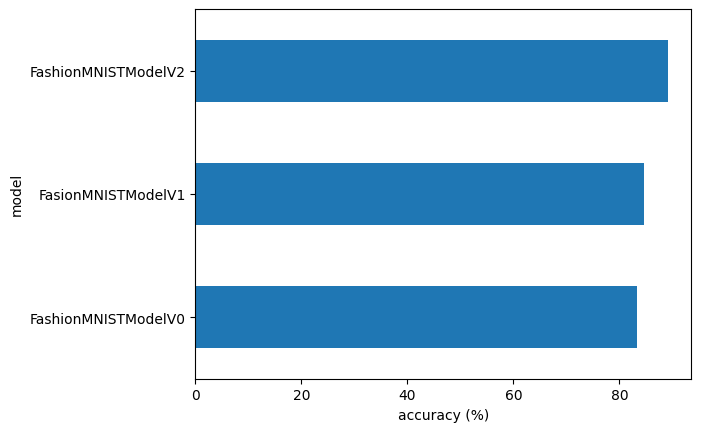

In [200]:
# Visualize our model results
compare_results.set_index('model_name')['model_acc'].plot(kind='barh')
plt.xlabel('accuracy (%)')
plt.ylabel('model')

## 9. Make and evaluate random predictions with the best model

In [201]:
def make_predictions(
    model: torch.nn.Module,
    data:list,
    device: torch.device = device
  ):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample  (add a batch dim and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass (model outputs: raw logits)
      pred_logit = model(sample)

      # Get prediction probability (logit -> pred prob)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())

    # Stack the pred_prob to turn list into a tensor
    return torch.stack(pred_probs)

In [202]:
img, label = test_data[0][:10]
img.shape, label

(torch.Size([1, 28, 28]), 9)

In [237]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View thw first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

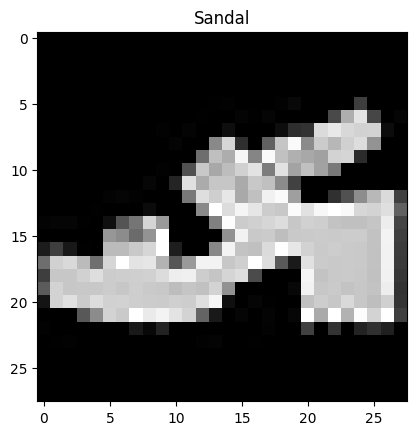

In [238]:
plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.title(class_names[test_labels[0]])

In [239]:
# Make predictions
pred_probs = make_predictions(
    model=model_2,
    data=test_samples
)

# View first 2 pred probabilities
pred_probs[:2]

tensor([[3.8871e-09, 1.5298e-10, 9.9990e-10, 1.3263e-09, 4.7311e-11, 1.0000e+00,
         3.1589e-08, 1.9438e-08, 3.8632e-07, 2.2533e-06],
        [1.0158e-01, 7.4054e-01, 7.8922e-04, 5.0458e-02, 1.3242e-02, 1.2031e-04,
         9.1093e-02, 1.2805e-04, 1.1949e-03, 8.5850e-04]])

In [240]:
# CONVER PRED PROBS TO LABELS (ARGMAX)
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [241]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

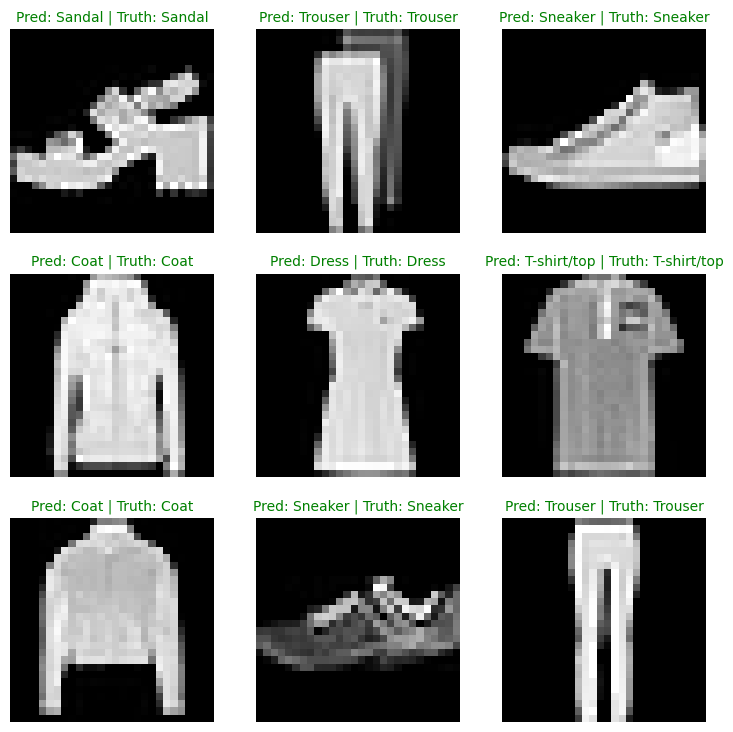

In [242]:
# Plot predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3

for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the image
  plt.imshow(sample.squeeze(), cmap='gray')

  # Find the prediction in text format
  pred_label = class_names[pred_classes[i]]

  # Get the true label
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c='g')
  else:
    plt.title(title_text, fontsize=10, c='r')

  plt.axis(False)

# 10. Making a confusion matrix for further prediction evaluation

1. **Make predictions** with our trained model, model_2 (a confusion matrix compares predictions to true labels).
2. Make a confusion matrix using torchmetrics.ConfusionMatrix.
3. Plot the confusion matrix using mlxtend.plotting.plot_confusion_matrix().


In [243]:
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)


Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [244]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 22.2 MB/s eta 0:00:00
mlxtend version: 0.23.1


In [245]:
# Import mlxtend upgraded version
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.23.1


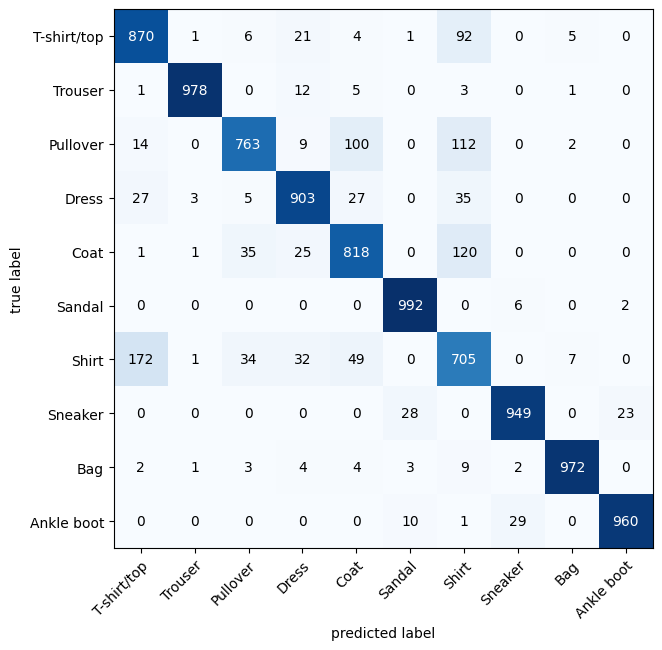

In [249]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names= class_names,
    figsize=(10,7)
)



## 11. Save and load best performing model

* torch.save - a function to save a whole PyTorch model or a model's state_dict().
* torch.load - a function to load in a saved PyTorch object.
* torch.nn.Module.load_state_dict() - a function to load a saved state_dict() into an existing model instance.


In [250]:
from pathlib import Path

# Create models directory (if it doesn't already exist), see: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), # only saving the state_dict() only saves the learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [251]:
# model_2.state_dict()

In [254]:
# Create a new instance
torch.manual_seed

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                    hidden_units=16, # try changing this to 128 and seeing what happens
                                    output_shape=10)

# Load in the saved state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
  )
)

In [255]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.29899415373802185,
 'model_acc': 89.10742811501598}

In [256]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn= loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.29899415373802185,
 'model_acc': 89.10742811501598}

In [257]:
# Check to see if results are close to each other (if they are very far away, there may be an error)
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-08, # absolute tolerance
              rtol=0.0001) # relative tolerance

tensor(True)

https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb


https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/solutions/03_pytorch_computer_vision_exercise_solutions.ipynb